In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("car_price_prediction.csv")

In [4]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
df.shape

(19237, 18)

ID has to use w.r.t to building a model

In [6]:
df[df.duplicated()]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
425,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
1581,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
1697,45732125,18503,-,TOYOTA,Prius,2010,Sedan,No,Petrol,1.8,162000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
1972,45507765,20385,-,MERCEDES-BENZ,CLS 500,2005,Sedan,Yes,Petrol,5,230000 km,8.0,Tiptronic,Rear,04-May,Left wheel,Silver,10
2131,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,45815465,2352,1273,LEXUS,IS 350,2015,Sedan,Yes,Petrol,3.5,80856 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19137,45810466,15125,642,CHEVROLET,Orlando,2012,Jeep,Yes,Diesel,2,156834 km,4.0,Automatic,Front,04-May,Left wheel,Golden,4
19200,45725908,36065,640,MERCEDES-BENZ,CLA 250 AMG,2013,Sedan,Yes,Petrol,2.0 Turbo,68000 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,12
19203,45761487,13485,645,TOYOTA,Prius,2011,Sedan,No,Hybrid,1.8,281600 km,6.0,Automatic,Front,04-May,Left wheel,Grey,8


In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df[df.duplicated()]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags


In [9]:
df.shape

(18924, 18)

In [10]:
df.drop('ID',axis = 1,inplace = True)

In [11]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  object 
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  object 
 9   Mileage           18924 non-null  object 
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Doors             18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  int64 

In [13]:
df[df['Levy'] == "-"]

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
9,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
11,8781,-,FORD,Transit,1999,Microbus,No,CNG,4,0 km,8.0,Manual,Rear,02-Mar,Left wheel,Blue,0
12,3000,-,OPEL,Vectra,1997,Goods wagon,No,CNG,1.6,350000 km,4.0,Manual,Front,04-May,Left wheel,White,4
23,7840,-,FORD,Transit,2001,Microbus,No,Diesel,2.0 Turbo,230000 km,4.0,Manual,Front,02-Mar,Left wheel,White,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19223,8781,-,DODGE,Caliber,2008,Hatchback,No,Petrol,2.4,0 km,4.0,Automatic,Front,04-May,Left wheel,Blue,4
19224,19130,-,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
19226,7840,-,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3,220000 km,6.0,Tiptronic,Rear,04-May,Right-hand drive,White,0
19229,50,-,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000 km,4.0,Automatic,Front,04-May,Left wheel,Silver,6


In [14]:
df['Levy'].replace({"-":np.nan},inplace=True)

In [15]:
df['Levy']

0        1399
1        1018
2         NaN
3         862
4         446
         ... 
19232     NaN
19233     831
19234     836
19235    1288
19236     753
Name: Levy, Length: 18924, dtype: object

In [16]:
df.isnull().sum()

Price                  0
Levy                5709
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

### EDA

<AxesSubplot:xlabel='Prod. year', ylabel='Price'>

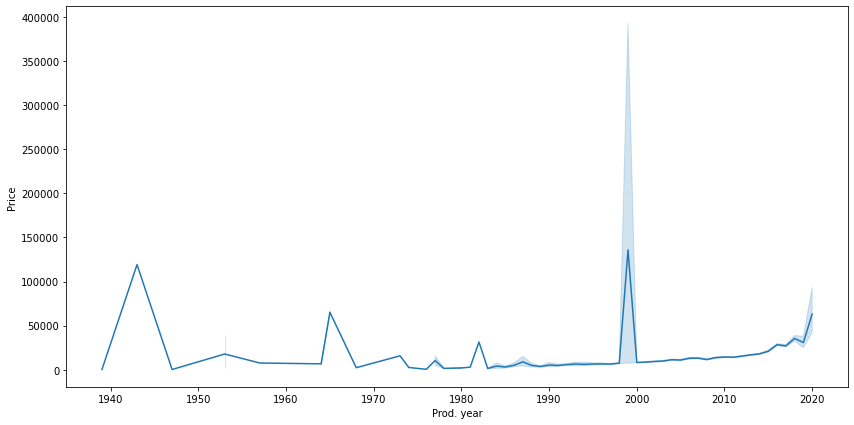

In [17]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(x= df['Prod. year'],y = df['Price'],ax = ax)

In [18]:
df['Category'].value_counts()

Sedan          8600
Jeep           5378
Hatchback      2799
Minivan         633
Coupe           528
Universal       361
Microbus        299
Goods wagon     229
Pickup           51
Cabriolet        35
Limousine        11
Name: Category, dtype: int64

C:\Users\lokes\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

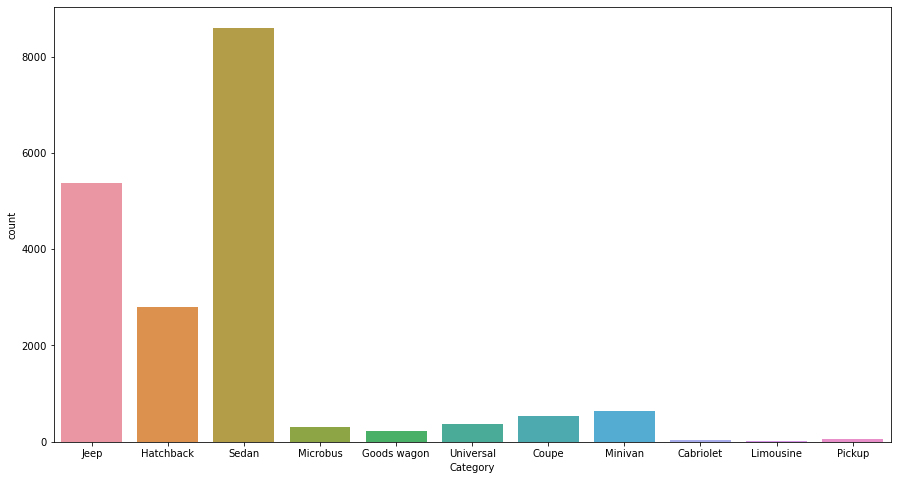

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(df['Category'])

C:\Users\lokes\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Leather interior', ylabel='count'>

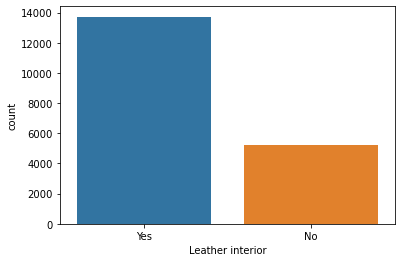

In [20]:
sns.countplot(df['Leather interior'])

In [21]:
df['Fuel type'].value_counts()

Petrol            9944
Diesel            4001
Hybrid            3539
LPG                885
CNG                469
Plug-in Hybrid      85
Hydrogen             1
Name: Fuel type, dtype: int64

C:\Users\lokes\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel type', ylabel='count'>

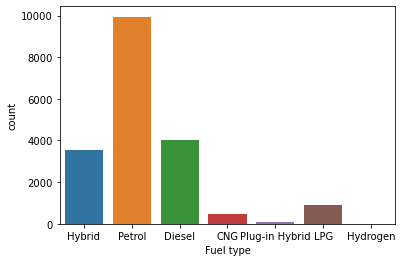

In [22]:
sns.countplot(df['Fuel type'])

<AxesSubplot:xlabel='Cylinders', ylabel='Density'>

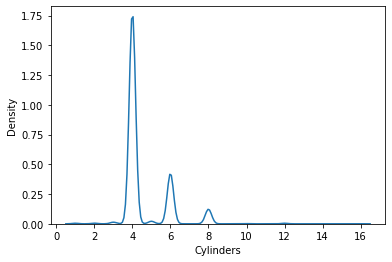

In [23]:
sns.kdeplot(df['Cylinders'])

C:\Users\lokes\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gear box type', ylabel='count'>

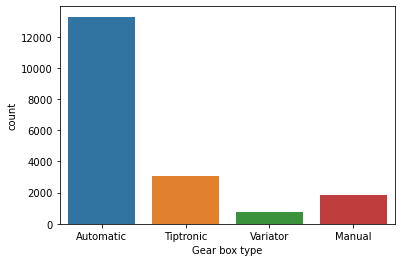

In [24]:
sns.countplot(df['Gear box type'])

In [25]:
df['Drive wheels'].value_counts()

Front    12695
4x4       3969
Rear      2260
Name: Drive wheels, dtype: int64

C:\Users\lokes\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Drive wheels', ylabel='count'>

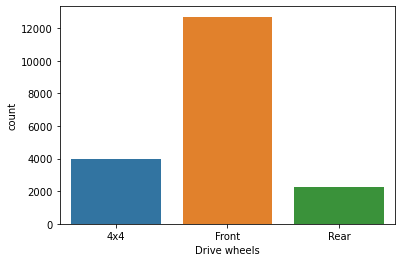

In [26]:
sns.countplot(df['Drive wheels'])

In [27]:
df['Doors'].value_counts()

04-May    18032
02-Mar      768
>5          124
Name: Doors, dtype: int64

C:\Users\lokes\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Doors', ylabel='count'>

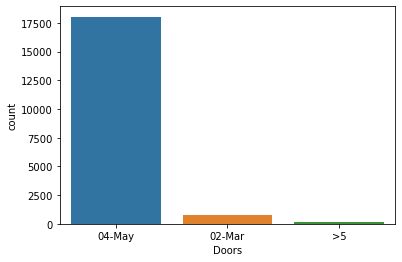

In [28]:
sns.countplot(df['Doors'])

In [29]:
df['Wheel'].value_counts()

Left wheel          17471
Right-hand drive     1453
Name: Wheel, dtype: int64

C:\Users\lokes\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Wheel', ylabel='count'>

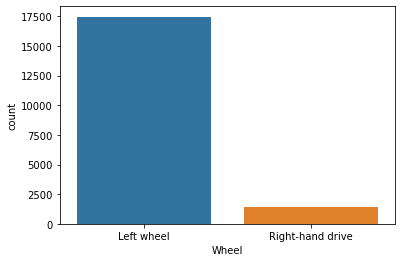

In [30]:
sns.countplot(df['Wheel'])

In [31]:
df['Color'].value_counts()

Black            4944
White            4407
Silver           3729
Grey             2343
Blue             1376
Red               622
Green             321
Orange            252
Brown             185
Carnelian red     177
Golden            143
Beige             134
Sky blue          122
Yellow            105
Purple             39
Pink               25
Name: Color, dtype: int64

C:\Users\lokes\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Color', ylabel='count'>

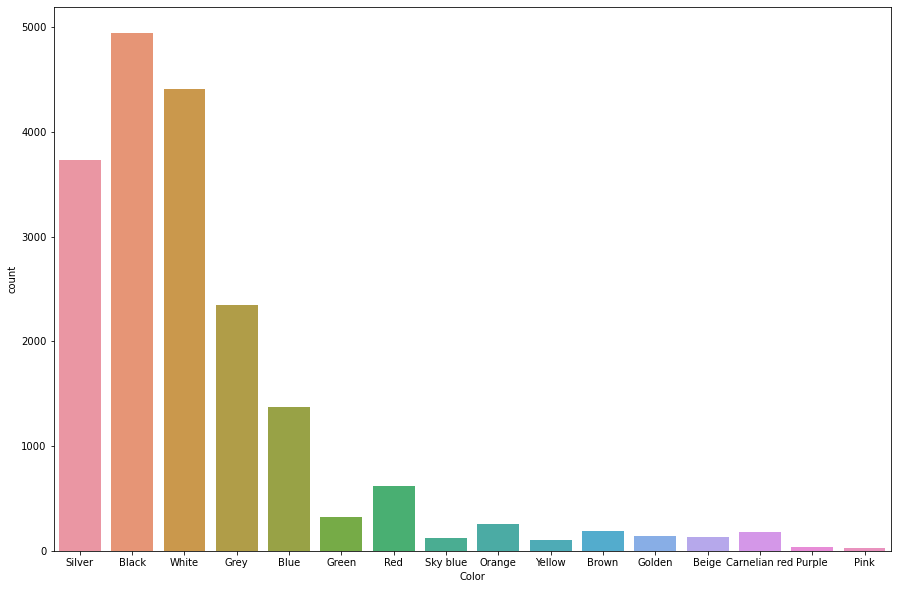

In [32]:
plt.figure(figsize=(15,10))
sns.countplot(df['Color'])

<AxesSubplot:xlabel='Airbags', ylabel='Density'>

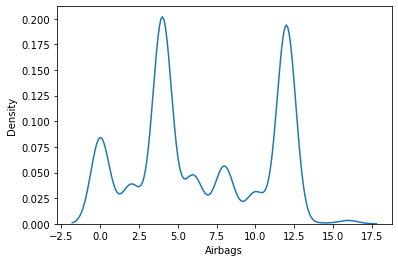

In [33]:
sns.kdeplot(df['Airbags'])

### Feature Engineering

In [34]:
df['Levy'] = df['Levy'].astype(float)

<AxesSubplot:xlabel='Levy', ylabel='Density'>

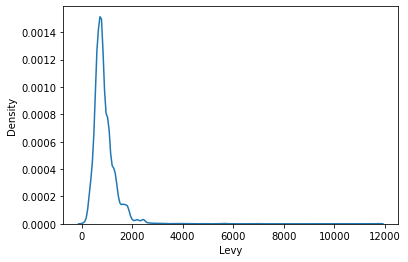

In [35]:
sns.kdeplot(df['Levy'])

In [36]:
# Replace the missing values with knn imputer it works better compare to other techinques
from sklearn.impute import KNNImputer

In [37]:
impute = KNNImputer(n_neighbors=5)

In [38]:
df['Levy'] = impute.fit_transform(df['Levy'].values.reshape(-1,1))

<AxesSubplot:xlabel='Levy', ylabel='Density'>

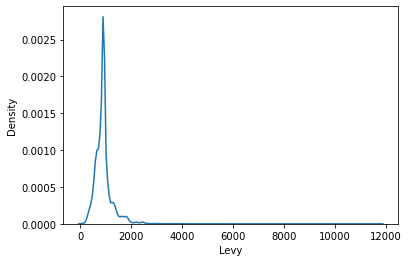

In [39]:
sns.kdeplot(df['Levy'])

In [40]:
# Performing a categorical encoding such as target guided encoding 
import category_encoders as ce

C:\Users\lokes\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [41]:
ge = ce.LeaveOneOutEncoder()

In [42]:
df['Manufacturer'] = ge.fit_transform(df['Manufacturer'],df['Price'])

In [43]:
target = ce.TargetEncoder()

C:\Users\lokes\Anaconda3\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\lokes\Anaconda3\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [44]:
df['Model'] = target.fit_transform(df['Model'],df['Price'])

In [45]:
df['Category'] = target.fit_transform(df['Category'],df['Price'])

In [46]:
df['Leather interior'] = df['Leather interior'].map({"Yes":1,"No" : 0})

In [47]:
df.corr()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Cylinders,Airbags
Price,1.000000,0.005509,0.001368,0.172346,0.012689,0.066310,0.000551,0.007435,-0.012709
Levy,0.005509,1.000000,0.039830,0.050279,-0.107800,0.098559,0.011109,0.459803,0.067877
Manufacturer,0.001368,0.039830,1.000000,0.270766,-0.131791,0.239927,-0.016356,0.028479,-0.111719
Model,0.172346,0.050279,0.270766,1.000000,0.017989,0.355076,0.002898,0.031720,-0.062909
Prod. year,0.012689,-0.107800,-0.131791,0.017989,1.000000,-0.126363,0.388608,-0.099443,0.235160
Category,0.066310,0.098559,0.239927,0.355076,-0.126363,1.000000,-0.088764,0.053244,-0.109118
Leather interior,0.000551,0.011109,-0.016356,0.002898,0.388608,-0.088764,1.000000,0.199716,0.161889
Cylinders,0.007435,0.459803,0.028479,0.031720,-0.099443,0.053244,0.199716,1.000000,0.174112
Airbags,-0.012709,0.067877,-0.111719,-0.062909,0.235160,-0.109118,0.161889,0.174112,1.000000


In [48]:
mean_encoding = df.groupby(['Fuel type'])['Price'].mean()

In [49]:
df['Fuel type'] = df['Fuel type'].map(mean_encoding)

In [50]:
df['Turbo'] = df['Engine volume'].str.contains("Turbo")

In [51]:
df['Turbo'] = df['Turbo'].map({False:0,True:1})

In [52]:
df['Engine volume'] = df['Engine volume'].str.split().str[0]

In [53]:
df['Engine volume'] = df['Engine volume'].astype(float)

In [54]:
df['Mileage'] = df['Mileage'].str.split().str[0]

In [55]:
df['Mileage'] = df['Mileage'].astype(float)

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

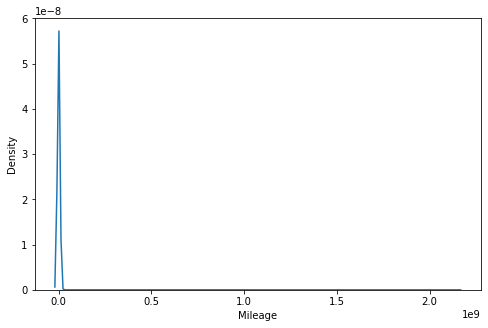

In [56]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Mileage'])

In [57]:
df['Gear box type'] = ge.fit_transform(df['Gear box type'],df['Price'])

In [58]:
df['Drive wheels'] = ge.fit_transform(df['Drive wheels'],df['Price'])

In [59]:
df['Doors'] = df['Doors'].map({'04-May':4, '02-Mar':2, '>5':5})

In [60]:
mean_encoding_1 = df.groupby(['Wheel'])['Price'].mean().sort_values(ascending = False)

In [61]:
df['Wheel'] = df['Wheel'].map(mean_encoding_1)

In [62]:
df['Color'] = ge.fit_transform(df['Color'],df['Price'])

In [63]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.000000,20059.856371,10658.569767,2010,23760.507252,1,10845.476688,3.5,186005.0,6.0,16004.934041,19581.879032,4,19394.079675,15122.514485,12,0
1,16621,1018.000000,14893.223709,7508.500062,2011,23760.507252,0,17391.153459,3.0,192000.0,6.0,26316.746084,19581.049143,4,19394.079675,18915.648594,8,0
2,8467,906.299205,14168.012513,11102.885135,2006,11354.611647,0,17391.153459,1.3,200000.0,4.0,14779.109290,18503.816055,4,8888.271851,18917.298199,2,0
3,3607,862.000000,15422.710212,8172.547945,2011,23760.507252,1,10845.476688,2.5,168966.0,4.0,16005.665989,19584.328881,4,19394.079675,18145.261689,0,0
4,11726,446.000000,14164.614181,11102.885135,2014,11354.611647,1,17391.153459,1.3,91901.0,4.0,16005.054665,18503.559319,4,19394.079675,15122.944206,4,0


<AxesSubplot:>

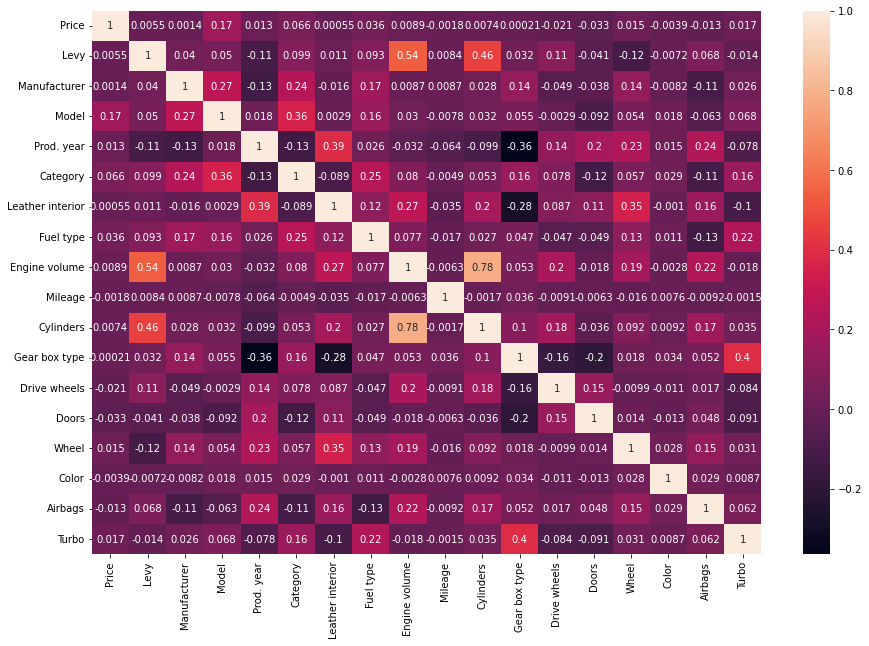

In [64]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2g')

### Outlier detection

In [65]:
Outliers = []
def data_outliers(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        Z_score = (i-mean)/std
        if abs(Z_score)>threshold:
            Outliers.append(i)
    return Outliers

In [66]:
data_outliers(df['Price'])

[627220, 872946, 26307500]

Using z score there not much of outlier but the most promient method is using IQR method to treat the outliers

In [67]:
Q1 = np.percentile(df['Price'],25)

In [68]:
Q1

5331.0

In [69]:
Q3 = np.percentile(df['Price'],75)

In [70]:
Q3

22063.0

In [71]:
IQR = Q3 - Q1


In [72]:
IQR

16732.0

In [73]:
lower_bond = Q1 - (1.5*IQR)
upper_bond = Q3 + (1.5*IQR)

In [74]:
lower_bond

-19767.0

In [75]:
upper_bond

47161.0

In [78]:
df[(df['Price'] < lower_bond) | (df['Price'] > upper_bond)]

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
14,59464,891.000000,22296.033530,39636.578748,2016,23760.507252,1,30684.792802,2.0,76000.0,4.0,16001.460206,18499.798645,4,19394.079675,18132.584203,4,0
36,51746,1077.000000,14292.061304,18587.435267,2019,23760.507252,0,17391.153459,2.0,10200.0,4.0,26305.282311,18500.406649,4,19394.079675,13584.317230,12,0
47,55390,1017.000000,22297.126341,39636.578748,2017,23760.507252,1,30684.792802,2.0,100734.0,4.0,16001.766960,18500.119584,4,19394.079675,18907.805381,4,0
56,87112,906.299205,18556.775220,19877.326531,2019,23760.507252,1,17391.153459,2.0,5323.0,4.0,26293.739883,19563.284274,4,19394.079675,19213.467122,0,1
73,53154,891.000000,22297.726127,39636.578748,2016,23760.507252,1,30684.792802,2.0,84506.0,4.0,16001.935321,18500.295730,4,19394.079675,15111.831545,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19144,56814,1017.000000,22296.744367,14379.360825,2017,14202.733837,1,17391.153459,2.0,67365.0,4.0,16001.659739,18500.007405,4,19394.079675,18907.517297,4,0
19161,64290,906.299205,20004.821814,18587.435267,2012,23760.507252,1,10845.476688,3.5,97000.0,6.0,14702.848361,19569.035786,4,19394.079675,18906.004855,12,0
19180,63886,1076.000000,22294.847371,14379.360825,2020,14202.733837,1,13320.505085,2.0,5305.0,4.0,16001.127249,18499.450291,4,19394.079675,15108.952790,4,0
19188,61154,579.000000,14289.451595,23378.926829,2017,23760.507252,0,10845.476688,2.5,71234.0,4.0,26302.211815,19569.826109,4,19394.079675,18132.200635,12,0


above cell shows the outliers

In [81]:
def outliers_detection(df,f):
    Q1 = np.percentile(df[f],25)
    Q3 = np.percentile(df[f],75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - (1.5*IQR)
    upper_bound = Q3 + (1.5*IQR)
    
    ls = df.index[(df[f] < lower_bound ) | (df[f] > upper_bound) ]
    
    return ls

In [82]:
df.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Turbo'],
      dtype='object')

In [83]:
index_list = []
## using for loop to extract all the outliers
for feature in ['Price', 'Levy', 'Mileage']:
    index_list.extend(outliers_detection(df,feature))

In [84]:
print(index_list)

[14, 36, 47, 56, 73, 90, 111, 127, 159, 189, 211, 232, 249, 261, 262, 263, 278, 283, 316, 370, 420, 424, 437, 445, 450, 451, 455, 483, 573, 579, 580, 581, 604, 618, 633, 650, 687, 711, 723, 724, 732, 740, 747, 839, 843, 849, 855, 857, 874, 902, 906, 907, 929, 977, 1019, 1027, 1083, 1090, 1106, 1128, 1132, 1143, 1145, 1162, 1171, 1179, 1218, 1222, 1225, 1261, 1265, 1272, 1278, 1297, 1299, 1316, 1325, 1342, 1364, 1383, 1401, 1428, 1448, 1459, 1478, 1487, 1490, 1509, 1510, 1537, 1539, 1557, 1562, 1573, 1582, 1609, 1612, 1626, 1657, 1662, 1672, 1673, 1704, 1726, 1737, 1740, 1766, 1781, 1803, 1805, 1820, 1823, 1832, 1916, 1956, 1970, 1993, 2010, 2037, 2054, 2055, 2058, 2071, 2085, 2109, 2182, 2184, 2192, 2283, 2325, 2330, 2353, 2365, 2366, 2372, 2411, 2416, 2438, 2504, 2534, 2535, 2550, 2560, 2569, 2604, 2615, 2618, 2675, 2676, 2691, 2726, 2728, 2742, 2768, 2794, 2799, 2830, 2859, 2912, 2922, 2924, 2932, 2941, 2942, 2965, 2988, 2996, 3006, 3021, 3028, 3032, 3064, 3086, 3101, 3111, 3127, 313

In [85]:
len(index_list)

4793

In [86]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

Moving non outliers to cleaned dataset 

In [89]:
df_cleaned = remove(df,index_list)

In [90]:
df_cleaned

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
1,16621,1018.000000,14893.223709,7508.500062,2011,23760.507252,0,17391.153459,3.0,192000.0,6.0,26316.746084,19581.049143,4,19394.079675,18915.648594,8,0
2,8467,906.299205,14168.012513,11102.885135,2006,11354.611647,0,17391.153459,1.3,200000.0,4.0,14779.109290,18503.816055,4,8888.271851,18917.298199,2,0
3,3607,862.000000,15422.710212,8172.547945,2011,23760.507252,1,10845.476688,2.5,168966.0,4.0,16005.665989,19584.328881,4,19394.079675,18145.261689,0,0
5,39493,891.000000,22301.390558,39636.578748,2016,23760.507252,1,30684.792802,2.0,160931.0,4.0,16002.963933,18501.371908,4,19394.079675,18137.116886,4,0
6,1803,761.000000,14305.915118,11436.182413,2010,11354.611647,1,10845.476688,1.8,258909.0,4.0,16005.801822,18504.341027,4,19394.079675,18145.671130,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,5802,1055.000000,18596.594025,10004.247191,2013,14202.733837,1,30684.792802,3.5,107800.0,6.0,16005.500715,17323.015051,4,19394.079675,19248.185312,12,0
19232,8467,906.299205,18595.288932,7574.917117,1999,21282.356061,1,8186.859275,2.0,300000.0,4.0,25874.875203,17321.835325,2,19394.079675,15123.818401,5,1
19233,15681,831.000000,22307.777897,14379.360825,2011,14202.733837,1,17391.153459,2.4,161600.0,4.0,26317.052872,18503.247755,4,19394.079675,13642.392915,8,0
19234,26108,836.000000,22304.980955,30050.122066,2010,23760.507252,1,30684.792802,2.0,116365.0,4.0,16003.971764,18502.426343,4,19394.079675,19239.514944,4,0


C:\Users\lokes\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

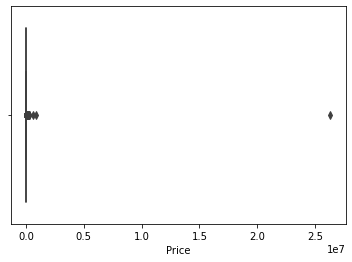

In [91]:
sns.boxplot(df['Price'])

C:\Users\lokes\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

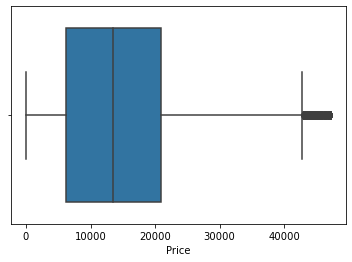

In [92]:
sns.boxplot(df_cleaned['Price'])

Still there are some outliers but using ensemble algorithm it won't get impacted by outliers

<AxesSubplot:>

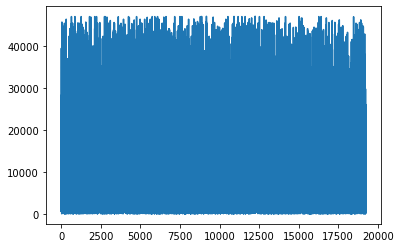

In [93]:
df_cleaned['Price'].plot()

<AxesSubplot:xlabel='Price', ylabel='Density'>

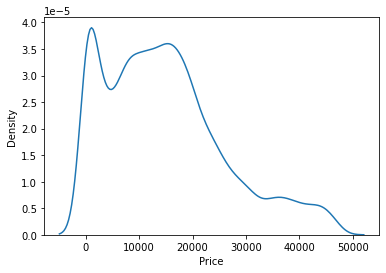

In [94]:
sns.kdeplot(df_cleaned['Price'])

In [95]:
x = df_cleaned.drop('Price',axis = 1)

In [96]:
x

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
1,1018.000000,14893.223709,7508.500062,2011,23760.507252,0,17391.153459,3.0,192000.0,6.0,26316.746084,19581.049143,4,19394.079675,18915.648594,8,0
2,906.299205,14168.012513,11102.885135,2006,11354.611647,0,17391.153459,1.3,200000.0,4.0,14779.109290,18503.816055,4,8888.271851,18917.298199,2,0
3,862.000000,15422.710212,8172.547945,2011,23760.507252,1,10845.476688,2.5,168966.0,4.0,16005.665989,19584.328881,4,19394.079675,18145.261689,0,0
5,891.000000,22301.390558,39636.578748,2016,23760.507252,1,30684.792802,2.0,160931.0,4.0,16002.963933,18501.371908,4,19394.079675,18137.116886,4,0
6,761.000000,14305.915118,11436.182413,2010,11354.611647,1,10845.476688,1.8,258909.0,4.0,16005.801822,18504.341027,4,19394.079675,18145.671130,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,1055.000000,18596.594025,10004.247191,2013,14202.733837,1,30684.792802,3.5,107800.0,6.0,16005.500715,17323.015051,4,19394.079675,19248.185312,12,0
19232,906.299205,18595.288932,7574.917117,1999,21282.356061,1,8186.859275,2.0,300000.0,4.0,25874.875203,17321.835325,2,19394.079675,15123.818401,5,1
19233,831.000000,22307.777897,14379.360825,2011,14202.733837,1,17391.153459,2.4,161600.0,4.0,26317.052872,18503.247755,4,19394.079675,13642.392915,8,0
19234,836.000000,22304.980955,30050.122066,2010,23760.507252,1,30684.792802,2.0,116365.0,4.0,16003.971764,18502.426343,4,19394.079675,19239.514944,4,0


In [97]:
y = df_cleaned['Price']

In [98]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [99]:
x_train

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
14963,906.299205,15244.432692,20015.971053,2013,14202.733837,0,10845.476688,2.4,112000.0,4.0,26315.824739,18502.951316,4,19394.079675,14494.394366,8,0
9184,906.299205,14157.220021,29579.227778,2012,14202.733837,1,10845.476688,1.5,180000.0,4.0,14764.969945,18503.000709,4,19394.079675,14039.842975,8,0
14815,781.000000,14306.306519,12604.988159,2012,14202.733837,1,10845.476688,2.5,314373.0,4.0,16005.908064,18504.452182,4,19394.079675,19250.495303,12,0
9732,906.299205,14059.395257,7752.920635,2008,14202.733837,1,17391.153459,2.0,226000.0,8.0,26318.588446,19582.471774,5,19394.079675,19245.976089,4,1
974,906.299205,14297.889875,12604.988159,2013,14202.733837,1,10845.476688,2.5,65000.0,4.0,16003.623447,18502.061919,4,19394.079675,18912.793445,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8142,906.299205,11319.146667,14684.360839,2012,21282.356061,1,17391.153459,1.4,81000.0,4.0,25872.664677,18503.495116,2,19394.079675,13647.449275,8,0
14116,640.000000,15425.884085,9663.047458,2013,14202.733837,1,10845.476688,2.0,339920.0,4.0,16005.925759,18504.470695,4,19394.079675,18146.044712,0,0
16485,707.000000,30940.810502,22416.802817,2011,23760.507252,1,30684.792802,2.0,120005.0,4.0,16004.234320,18502.701040,4,19394.079675,18914.434756,4,0
1999,779.000000,14297.261304,23378.926829,2013,23760.507252,0,17391.153459,2.5,90000.0,4.0,16003.452827,18501.883409,4,19394.079675,19236.572161,7,0


In [100]:
y_train

14963    19444
9184     18817
14815      392
9732     10976
974      30734
         ...  
8142     12541
14116      157
16485    22621
1999     33000
5753     21326
Name: Price, Length: 11557, dtype: int64

In [101]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [102]:
x_train = sc.fit_transform(x_train)

In [103]:
x_test = sc.transform(x_test)

In [104]:
from sklearn.tree import DecisionTreeRegressor

In [105]:
dt = DecisionTreeRegressor()

In [106]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [107]:
dt.score(x_train,y_train)

1.0

In [108]:
dt.score(x_test,y_test)

0.9997489488738827

In [109]:
pred = dt.predict(x_test)

In [110]:
pred

array([24283.,  3500., 39201., ...,  2666.,  6272.,   188.])

In [111]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [112]:
mean_absolute_error(pred,y_test)

17.790657439446367

In [113]:
np.sqrt(mean_squared_error(pred,y_test))

172.1743774868252

In [114]:
mean_absolute_percentage_error(pred,y_test)

0.0054731756501676205

In [115]:
from sklearn.metrics import r2_score

In [116]:
r2_score(pred,y_test)

0.9997489285223313

In [117]:
from sklearn.model_selection import cross_val_score

In [118]:
scores = cross_val_score(dt, x_train, y_train, scoring='r2', cv=5)

In [119]:
scores

array([0.99938881, 0.99346168, 0.99965042, 0.99706009, 0.99792001])

In [120]:
scores = cross_val_score(dt, x_train, y_train, scoring='neg_mean_absolute_error', cv=5)

In [121]:
(-scores)

array([52.84948097, 48.11721453, 47.24275206, 22.28083081, 33.8351363 ])

Model got good accuracy i not even performed hyper parameters tuning
Instead of normal label encoding i performed target guided encoding and mean encoding it gave strong correlation with target
variable.

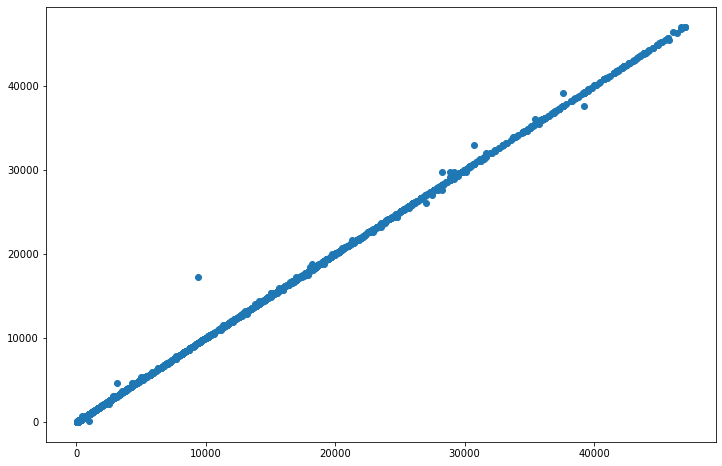

In [122]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,pred)

From above figure u can see i plotted actual vs predicted and it gave a nice slope 

using Mean encoding and target guided encoding it may lead to overfit, in these case model performed value it gave stronger
correlation compare to normal onehot or label encoding